### Connect to postgrsqlDB

In [134]:
from sqlalchemy import create_engine
import pandas as pd

# Remplacer les valeurs suivantes par vos informations de connexion
DATABASE = 'fintechdata'
USER = 'fintechuser'
PASSWORD = 'root1'
HOST = 'localhost'
PORT = '5432'

# Créer une connexion à la base de données
engine = create_engine(f'postgresql://{USER}:{PASSWORD}@{HOST}:{PORT}/{DATABASE}')

# Charger les données dans un DataFrame
query = "SELECT * FROM transactions"
df = pd.read_sql(query, engine)
df


,transaction_id,amount,date_time,customer_id,age,gender,product_category,quantity,payment_type,store_location,day_of_week,month,time_of_day,status
0,2,723.67,2023-12-07 17:29:41.272490,1,32,Female,Electronics,5,Credit Card,Paris,Sunday,March,Morning,Completed
1,6,796.91,2023-04-02 04:48:00.446476,1,32,Female,Clothing,1,PayPal,Paris,Thursday,April,Evening,Cancelled
2,8,811.52,2023-04-15 04:14:59.742626,1,32,Female,Electronics,3,PayPal,Paris,Sunday,August,Evening,Completed
3,10,32.05,2023-02-10 03:31:50.919528,1,32,Female,Services,6,PayPal,New York,Wednesday,September,Evening,Completed
4,11,596.66,2023-01-22 00:19:05.599732,1,32,Female,Services,4,PayPal,New York,Saturday,February,Morning,Completed
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,70,NaN,2023-02-06 17:10:05.377894,1,32,Female,Services,2,PayPal,Paris,Sunday,April,Evening,Cancelled
96,77,NaN,2023-07-05 16:58:36.010171,1,32,Female,Clothing,4,PayPal,New York,Thursday,October,Morning,Completed
97,86,NaN,2023-09-07 12:13:34.703048,1,32,Female,Electronics,5,PayPal,New York,Tuesday,January,Morning,Completed
98,94,NaN,2023-06-28 19:30:51.116875,1,32,Female,Clothing,4,PayPal,New York,Friday,December,Evening,Completed


### Valeurs manquantes, ...

In [135]:
# Remplacer les valeurs manquantes par la moyenne (pour les données numériques)
df['amount'].fillna(df['amount'].mean(), inplace=True)


# Ou supprimer les lignes où certaines colonnes essentielles sont manquantes
df.dropna(subset=['customer_id', 'date_time'], inplace=True)

df

,transaction_id,amount,date_time,customer_id,age,gender,product_category,quantity,payment_type,store_location,day_of_week,month,time_of_day,status
0,2,723.670000,2023-12-07 17:29:41.272490,1,32,Female,Electronics,5,Credit Card,Paris,Sunday,March,Morning,Completed
1,6,796.910000,2023-04-02 04:48:00.446476,1,32,Female,Clothing,1,PayPal,Paris,Thursday,April,Evening,Cancelled
2,8,811.520000,2023-04-15 04:14:59.742626,1,32,Female,Electronics,3,PayPal,Paris,Sunday,August,Evening,Completed
3,10,32.050000,2023-02-10 03:31:50.919528,1,32,Female,Services,6,PayPal,New York,Wednesday,September,Evening,Completed
4,11,596.660000,2023-01-22 00:19:05.599732,1,32,Female,Services,4,PayPal,New York,Saturday,February,Morning,Completed
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,70,204.350349,2023-02-06 17:10:05.377894,1,32,Female,Services,2,PayPal,Paris,Sunday,April,Evening,Cancelled
96,77,204.350349,2023-07-05 16:58:36.010171,1,32,Female,Clothing,4,PayPal,New York,Thursday,October,Morning,Completed
97,86,204.350349,2023-09-07 12:13:34.703048,1,32,Female,Electronics,5,PayPal,New York,Tuesday,January,Morning,Completed
98,94,204.350349,2023-06-28 19:30:51.116875,1,32,Female,Clothing,4,PayPal,New York,Friday,December,Evening,Completed


Converti tous les mauvaises valeurs de "amount" en NaN

In [136]:
df['amount'] = pd.to_numeric(df['amount'], errors='coerce')  # Convertit en nombre, force les erreurs en NaN
df

,transaction_id,amount,date_time,customer_id,age,gender,product_category,quantity,payment_type,store_location,day_of_week,month,time_of_day,status
0,2,723.670000,2023-12-07 17:29:41.272490,1,32,Female,Electronics,5,Credit Card,Paris,Sunday,March,Morning,Completed
1,6,796.910000,2023-04-02 04:48:00.446476,1,32,Female,Clothing,1,PayPal,Paris,Thursday,April,Evening,Cancelled
2,8,811.520000,2023-04-15 04:14:59.742626,1,32,Female,Electronics,3,PayPal,Paris,Sunday,August,Evening,Completed
3,10,32.050000,2023-02-10 03:31:50.919528,1,32,Female,Services,6,PayPal,New York,Wednesday,September,Evening,Completed
4,11,596.660000,2023-01-22 00:19:05.599732,1,32,Female,Services,4,PayPal,New York,Saturday,February,Morning,Completed
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,70,204.350349,2023-02-06 17:10:05.377894,1,32,Female,Services,2,PayPal,Paris,Sunday,April,Evening,Cancelled
96,77,204.350349,2023-07-05 16:58:36.010171,1,32,Female,Clothing,4,PayPal,New York,Thursday,October,Morning,Completed
97,86,204.350349,2023-09-07 12:13:34.703048,1,32,Female,Electronics,5,PayPal,New York,Tuesday,January,Morning,Completed
98,94,204.350349,2023-06-28 19:30:51.116875,1,32,Female,Clothing,4,PayPal,New York,Friday,December,Evening,Completed


**Suppression des valeurs abérantes**

In [137]:
# Éliminer les valeurs aberrantes pour 'amount'
import numpy as np
amount_std = df['amount'].std()
amount_mean = df['amount'].mean()
cutoff = amount_std * 3

lower_bound = amount_mean - cutoff
upper_bound = amount_mean + cutoff

df = df[(df['amount'] >= lower_bound) & (df['amount'] <= upper_bound)]
df


,transaction_id,amount,date_time,customer_id,age,gender,product_category,quantity,payment_type,store_location,day_of_week,month,time_of_day,status
0,2,723.670000,2023-12-07 17:29:41.272490,1,32,Female,Electronics,5,Credit Card,Paris,Sunday,March,Morning,Completed
1,6,796.910000,2023-04-02 04:48:00.446476,1,32,Female,Clothing,1,PayPal,Paris,Thursday,April,Evening,Cancelled
2,8,811.520000,2023-04-15 04:14:59.742626,1,32,Female,Electronics,3,PayPal,Paris,Sunday,August,Evening,Completed
3,10,32.050000,2023-02-10 03:31:50.919528,1,32,Female,Services,6,PayPal,New York,Wednesday,September,Evening,Completed
4,11,596.660000,2023-01-22 00:19:05.599732,1,32,Female,Services,4,PayPal,New York,Saturday,February,Morning,Completed
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,70,204.350349,2023-02-06 17:10:05.377894,1,32,Female,Services,2,PayPal,Paris,Sunday,April,Evening,Cancelled
96,77,204.350349,2023-07-05 16:58:36.010171,1,32,Female,Clothing,4,PayPal,New York,Thursday,October,Morning,Completed
97,86,204.350349,2023-09-07 12:13:34.703048,1,32,Female,Electronics,5,PayPal,New York,Tuesday,January,Morning,Completed
98,94,204.350349,2023-06-28 19:30:51.116875,1,32,Female,Clothing,4,PayPal,New York,Friday,December,Evening,Completed


**Download csv result**

In [138]:
# df.to_csv('transactions_clean.csv', index=False)

print(df.describe())

       transaction_id      amount                      date_time  customer_id  \
count      100.000000  100.000000                            100        100.0   
mean        50.500000  204.350349  2023-06-24 18:18:59.564433152          1.0   
min          1.000000 -927.650000     2023-01-06 09:07:03.386276          1.0   
25%         25.750000   71.367500  2023-03-12 09:12:27.144525312          1.0   
50%         50.500000  217.570000  2023-06-29 12:18:25.600776448          1.0   
75%         75.250000  620.555000  2023-09-12 17:25:53.776657920          1.0   
max        100.000000  988.480000     2023-12-22 19:03:09.566253          1.0   
std         29.011492  538.508134                            NaN          0.0   

         age   quantity  
count  100.0  100.00000  
mean    32.0    3.40000  
min     32.0    1.00000  
25%     32.0    2.00000  
50%     32.0    3.00000  
75%     32.0    5.00000  
max     32.0    6.00000  
std      0.0    1.61433  


**Test**

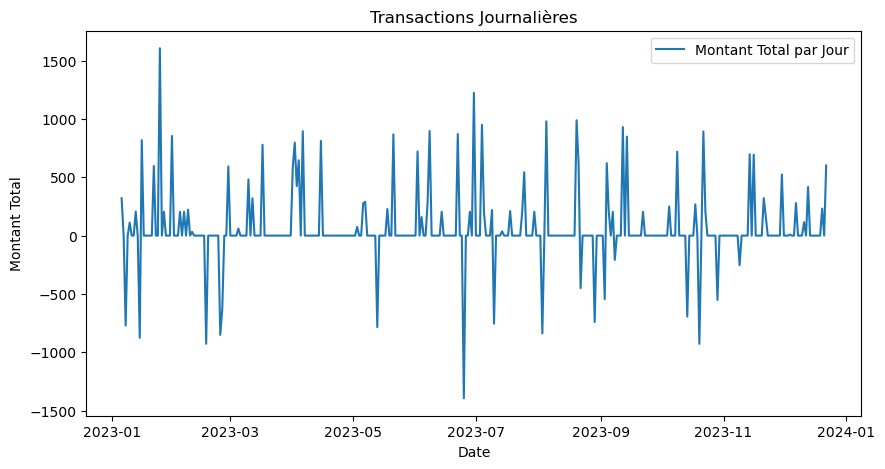

In [139]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

df.set_index('date_time', inplace=True)

daily_transactions = df.resample('D').sum()
plt.figure(figsize=(10, 5))
plt.plot(daily_transactions.index, daily_transactions['amount'], label='Montant Total par Jour')
plt.title('Transactions Journalières')
plt.xlabel('Date')
plt.ylabel('Montant Total')
plt.legend()
plt.show()


In [140]:

df['lag_1'] = df['amount'].shift(1)
df['lag_2'] = df['amount'].shift(2)
df['lag_3'] = df['amount'].shift(3)

df['month'] = df.index.month
df['day_of_week'] = df.index.dayofweek  



df

,transaction_id,amount,customer_id,age,gender,product_category,quantity,payment_type,store_location,day_of_week,month,time_of_day,status,lag_1,lag_2,lag_3
date_time,,,,,,,,,,,,,,,,
2023-12-07 17:29:41.272490,2,723.670000,1,32,Female,Electronics,5,Credit Card,Paris,3,12,Morning,Completed,NaN,NaN,NaN
2023-04-02 04:48:00.446476,6,796.910000,1,32,Female,Clothing,1,PayPal,Paris,6,4,Evening,Cancelled,723.670000,NaN,NaN
2023-04-15 04:14:59.742626,8,811.520000,1,32,Female,Electronics,3,PayPal,Paris,5,4,Evening,Completed,796.910000,723.670000,NaN
2023-02-10 03:31:50.919528,10,32.050000,1,32,Female,Services,6,PayPal,New York,4,2,Evening,Completed,811.520000,796.910000,723.670000
2023-01-22 00:19:05.599732,11,596.660000,1,32,Female,Services,4,PayPal,New York,6,1,Morning,Completed,32.050000,811.520000,796.910000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-02-06 17:10:05.377894,70,204.350349,1,32,Female,Services,2,PayPal,Paris,0,2,Evening,Cancelled,204.350349,204.350349,204.350349
2023-07-05 16:58:36.010171,77,204.350349,1,32,Female,Clothing,4,PayPal,New York,2,7,Morning,Completed,204.350349,204.350349,204.350349
2023-09-07 12:13:34.703048,86,204.350349,1,32,Female,Electronics,5,PayPal,New York,3,9,Morning,Completed,204.350349,204.350349,204.350349


In [141]:
from sklearn.model_selection import train_test_split

# Préparez vos caractéristiques (X) et cible (y)
X = df[['lag_1', 'lag_2', 'lag_3', 'month', 'day_of_week']]
y = df['amount']

# Supprimez les lignes avec des valeurs NaN dues aux lags
X.dropna(inplace=True)
y = y.loc[X.index]

# Division des données
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


/var/folders/g4/p_c2c51j0z1_048sssnrdsl40000gn/T/ipykernel_94227/2126160044.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X.dropna(inplace=True)


In [142]:
from sklearn.ensemble import RandomForestRegressor

# Entraînement du modèle
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)


print(X_train)
print(y_train)
# Prédiction
predictions = model.predict(X_test)





                                 lag_1       lag_2       lag_3  month  \
date_time                                                               
2023-11-22 21:09:44.591869  892.480000  206.070000  215.340000     11   
2023-09-05 12:57:01.833102 -838.220000 -875.540000 -253.220000      9   
2023-01-15 01:30:59.505115 -253.220000 -544.100000 -770.240000      1   
2023-01-25 22:00:12.406806  948.900000  423.720000  114.930000      1   
2023-05-18 18:23:14.866278  231.510000  719.710000  368.550000      5   
...                                ...         ...         ...    ...   
2023-05-07 08:11:40.882344  720.840000  988.480000  321.360000      5   
2023-02-24 16:27:04.708926  204.350349 -838.220000 -875.540000      2   
2023-07-04 00:12:20.029533  423.720000  114.930000  778.680000      7   
2023-02-06 17:10:05.377894  204.350349  204.350349  204.350349      2   
2023-07-14 04:33:35.775080  958.610000  164.550000  892.480000      7   

                            day_of_week  
date_tim

In [143]:
from sklearn.metrics import mean_squared_error, mean_absolute_error

mse = mean_squared_error(y_test, predictions)
mae = mean_absolute_error(y_test, predictions)
print(f"MSE: {mse}, MAE: {mae}")

latest_data = df.iloc[-1]  # dernier jour connu
next_month = (latest_data.name.month % 12) + 1  # calcul du mois suivant
next_day_of_week = (latest_data.name.weekday() + 1) % 7  # jour de la semaine suivant

next_month_features = pd.DataFrame({
    'lag_1': [latest_data['amount']],
    'lag_2': [df.iloc[-2]['amount'] if len(df) > 1 else np.nan],
    'lag_3': [df.iloc[-3]['amount'] if len(df) > 2 else np.nan],
    'month': [next_month],
    'day_of_week': [next_day_of_week]
})

next_month_features

# Prédictions pour le mois prochain
next_month_predictions = model.predict(next_month_features)
print(f"Prédictions pour le mois prochain: {next_month_predictions}")

MSE: 204800.0802178746, MAE: 406.0192458720931
Prédictions pour le mois prochain: [233.09511047]


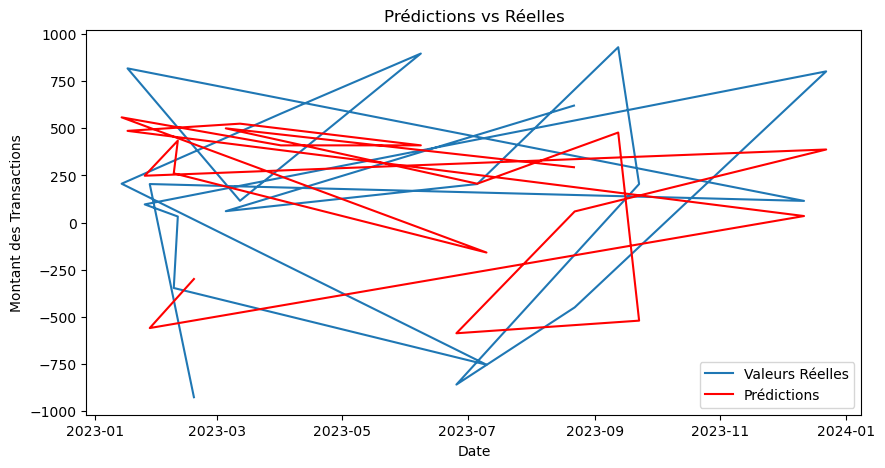

In [144]:

plt.figure(figsize=(10, 5))
plt.plot(y_test.index, y_test, label='Valeurs Réelles')
plt.plot(y_test.index, predictions, label='Prédictions', color='red')
plt.title('Prédictions vs Réelles')
plt.xlabel('Date')
plt.ylabel('Montant des Transactions')
plt.legend()
plt.show()